## Задача 6

### Необходимо найти все публичные компании (что такое публичная компания?), которые продают обувь в мире. Сравнить их текущие капитализации (что такое капитализация?). Найти и скачать динамику цен их акций на бирже
(подсказка 1: Yahoo Finance, подсказка 2: есть библиотека на Python, которая позволяет по тикеру компании скачивать любые данные с этого сайта автоматически).

* Публичная компания -  это компания, акции которой могут свободно торговаться на бирже  и принадлежать представителям широкой общественности.
* Капитализация (рыночная) - показатель, характеризующий стоимость компании, рассчитывается как долларовая стоимость всех выпущенных акций, сложившаяся на бирже.

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

Итак были отобраны следующие публичные компании, продающие обувь в мире:

CROX, Steven Madden, NIKE, Wolverine World Wide, PUMA SE, Rocky Brands, Skechers U.S.A., Deckers Outdoor Corporation, Caleres, Weyco Group.

In [199]:
tickers=['CROX','SHOO','NKE','WWW', 'PMMAF','RCKY', 'SKX', 'DECK', 'CAL', 'WEYS']
data_shoes = web.get_quote_yahoo(tickers)
market_cap_data = data_shoes.marketCap
market_cap_data.sort_values(ascending=False)

NKE      176094609408
DECK      10002333696
PMMAF      8590563328
SKX        6613506048
CROX       5842919936
SHOO       2620780032
WWW         830078784
CAL         791921792
WEYS        247771392
RCKY        186383872
Name: marketCap, dtype: int64

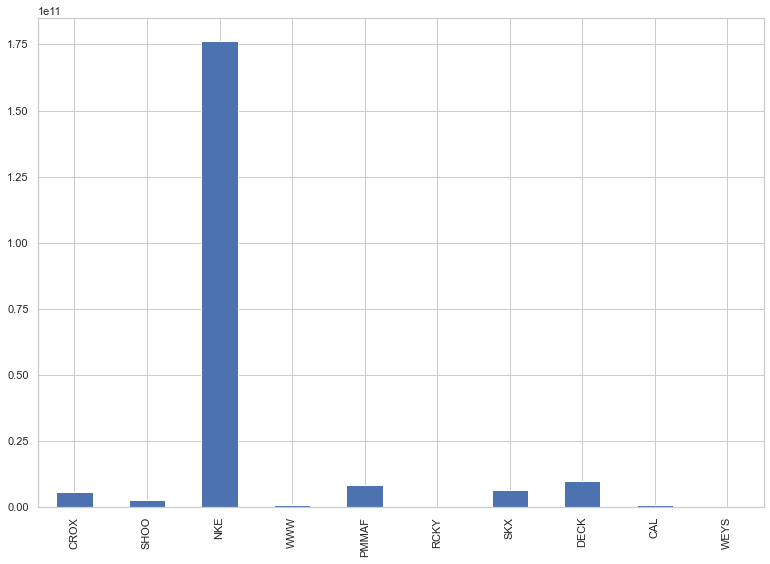

In [201]:
plt.figure(figsize=(13,9))
market_cap_data.plot.bar()
sns.set(style='whitegrid')
plt.show()

Сравнив капитализации компаний, можно сделать вывод, что на 1 месте с большим отрывом - компания NIKE с капитализацией более 179 млрд долларов. Капитализация остальных компаний находится в промежутке от 247 млндолларов до 10 млрд долларов.

Посмотрим на динамику цен акций компаний на бирже. Интервал взят за последние 4 недели, для большей наглядности цены  акции посчитаны по неделям.

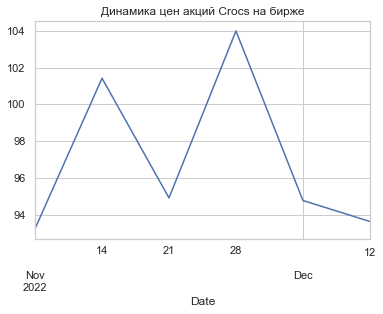

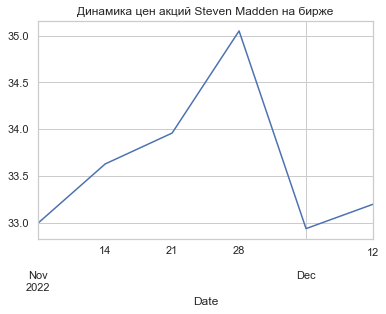

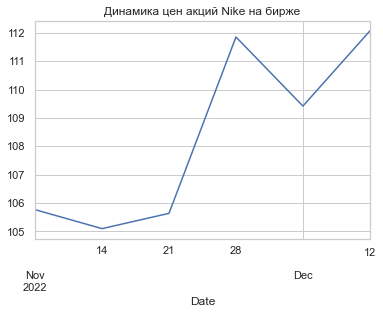

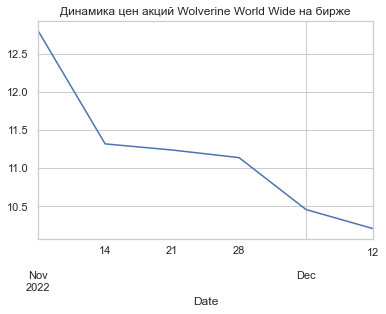

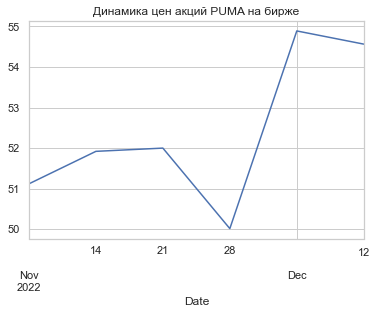

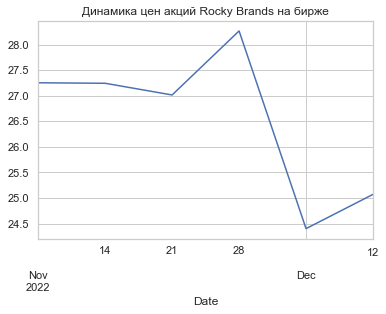

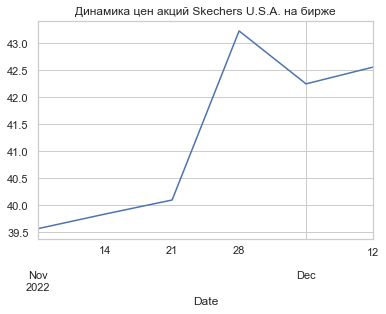

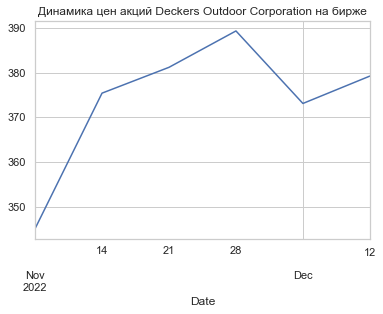

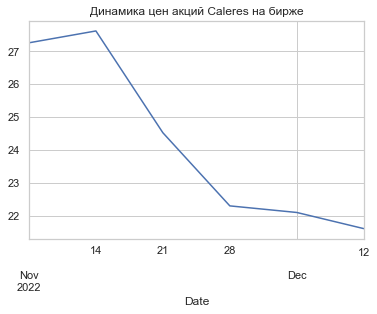

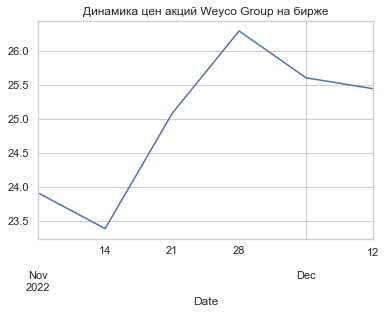

In [6]:
plt.title('Динамика цен акций Crocs на бирже')
web.get_data_yahoo('CROX',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Steven Madden на бирже')
web.get_data_yahoo('SHOO',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Nike на бирже')
web.get_data_yahoo('NKE',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Wolverine World Wide на бирже')
web.get_data_yahoo('WWW',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций PUMA на бирже')
web.get_data_yahoo('PMMAF',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Rocky Brands на бирже')
web.get_data_yahoo('RCKY',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Skechers U.S.A. на бирже')
web.get_data_yahoo('SKX',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Deckers Outdoor Corporation на бирже')
web.get_data_yahoo('DECK',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Caleres на бирже')
web.get_data_yahoo('CAL',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

plt.title('Динамика цен акций Weyco Group на бирже')
web.get_data_yahoo('WEYS',  start= '11/7/22', end='12/12/22', interval='w')['Adj Close'].plot() 
plt.show()

У 8 компаний из 10 заметен большой или средний скачок цен на акции к 28 ноября, а у остальных двух наоборот - резкое снижение цены. Возможно на фоне распродаж "Черная пятница", которые проходят в конце ноября, изменились финансовые показатели компаний, которые влияют на стоимость их акций на бирже.

### Как финансовые показатели (выручка, чистая прибыль и т. п.) этих компаний связаны со стоимостью их акций на бирже. Есть ли, по твоему мнению, недооцененные компании?

На стоимость акции компании в основном влияют следующие показатели: 
* выручка
* чистая прибыль
* показатель сколько прибыли компании припадает на её одну акцию
* прибыль в расчете на акцию
* мультипликатор P/E
* коэффициент текущей ликвидности
* общий долг



In [17]:
import yahoo_fin.stock_info as si

In [203]:
fin_indicators = []
for t in tickers:
    fin_indicators.append({'name': t, 
               'net_income': si.get_stats(t).query('Attribute == "Net Income Avi to Common (ttm)"')['Value'],
               'revenue': si.get_stats(t).query('Attribute == "Revenue (ttm)"')['Value'],
               'eps': si.get_stats(t).query('Attribute == "Diluted EPS (ttm)"')['Value'],
               'current_ratio': si.get_stats(t).query('Attribute == "Current Ratio (mrq)"')['Value'],
               'total_debt': si.get_stats(t).query('Attribute == "Total Debt (mrq)"')['Value'],
               'stock_price' : web.get_quote_yahoo(t).price[0] })
    
fin_indicators = pd.DataFrame(fin_indicators)
fin_indicators

,name,net_income,revenue,eps,current_ratio,total_debt,stock_price
0,CROX,"40 557.28M Name: Value, dtype: object","35 3.2B Name: Value, dtype: object","41 8.94 Name: Value, dtype: object","47 1.97 Name: Value, dtype: object","45 2.9B Name: Value, dtype: object",94.5300
1,SHOO,"40 250.26M Name: Value, dtype: object","35 2.23B Name: Value, dtype: object","41 3.18 Name: Value, dtype: object","47 2.92 Name: Value, dtype: object","45 110.14M Name: Value, dtype: object",33.6100
2,NKE,"40 5.64B Name: Value, dtype: object","35 47.15B Name: Value, dtype: object","41 3.52 Name: Value, dtype: object","47 2.64 Name: Value, dtype: object","45 12.59B Name: Value, dtype: object",112.7700
3,WWW,"40 155.6M Name: Value, dtype: object","35 2.66B Name: Value, dtype: object","41 1.95 Name: Value, dtype: object","47 1.17 Name: Value, dtype: object","45 1.66B Name: Value, dtype: object",10.5650
4,PMMAF,"40 360M Name: Value, dtype: object","35 8.04B Name: Value, dtype: object","41 2.56 Name: Value, dtype: object","47 1.54 Name: Value, dtype: object","45 1.59B Name: Value, dtype: object",57.4201
5,RCKY,"40 26.5M Name: Value, dtype: object","35 646M Name: Value, dtype: object","41 3.58 Name: Value, dtype: object","47 3.02 Name: Value, dtype: object","45 292.16M Name: Value, dtype: object",24.9450
6,SKX,"40 699.93M Name: Value, dtype: object","35 7.22B Name: Value, dtype: object","41 4.49 Name: Value, dtype: object","47 2.27 Name: Value, dtype: object","45 1.61B Name: Value, dtype: object",42.7600
7,DECK,"40 448.14M Name: Value, dtype: object","35 3.41B Name: Value, dtype: object","41 16.02 Name: Value, dtype: object","47 2.63 Name: Value, dtype: object","45 197.14M Name: Value, dtype: object",379.2550
8,CAL,"40 167.59M Name: Value, dtype: object","35 2.95B Name: Value, dtype: object","41 4.67 Name: Value, dtype: object","47 0.89 Name: Value, dtype: object","45 951.44M Name: Value, dtype: object",22.0600
9,WEYS,"40 29.66M Name: Value, dtype: object","35 354.07M Name: Value, dtype: object","41 3.08 Name: Value, dtype: object","47 3.05 Name: Value, dtype: object","45 48.09M Name: Value, dtype: object",25.7400


In [204]:
fin_indicators.to_csv('fin_indicators1_.csv', sep=';')

Датафрейм получился, но к финансовым показателям прикрепились индексы из исходного датафрейма и прочая ненужная информация, от которых у меня не получилось избавиться Питоновскими методами, поэтому я очистила данные в Excel, преобразовала данные показателей чистой прибыли, выручки и общего долга в млрд и снова загрузила сюда.

In [206]:
fin_indicators = pd.read_csv('fin_indicators_.csv', sep=';')
fin_indicators['P/E'] = fin_indicators['stock_price']/fin_indicators['eps'] #вручную рассчитем мультипликатор P/E
fin_indicators

,name,net_income,revenue,eps,current_ratio,total_debt,stock_price,P/E
0,CROX,0.55728,3.200000,8.94,1.97,2.90000,93.630,10.473154
1,SHOO,0.25026,2.230000,3.18,2.92,0.11014,33.200,10.440252
2,NKE,5.64000,47.150000,3.52,2.64,12.59000,112.070,31.838068
3,WWW,0.15560,2.660000,1.95,1.17,1.66000,10.210,5.235897
4,PMMAF,0.36000,8.040000,2.56,1.54,1.59000,54.565,21.314453
5,RCKY,0.02650,0.646000,3.58,3.02,0.29216,25.070,7.002793
6,SKX,0.69993,7.220000,4.49,2.27,1.61000,42.560,9.478842
7,DECK,0.44814,3.410000,16.02,2.63,0.19714,379.220,23.671660
8,CAL,0.16759,2.950000,4.67,0.89,0.95144,21.620,4.629550
9,WEYS,0.02966,0.035407,3.08,3.05,0.04809,25.450,8.262987


Посмотрим, как влияют финансовые показатели на стоимость акций с помощью матрицы корреляций. Но однозначно делать выводы только по матрице нельзя, так как коэфициент Пирсона определяет силу только линейной взаимосвязи, а так же у нас мало компаний в выборке. 
Для расчета матрицы уберем компанию "DECK", так как из-за аномально высокой цены на акцию у этой компании, корреляция подсчитывается не совсем корректно.

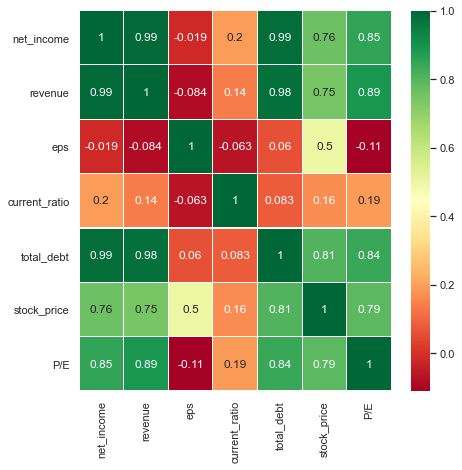

In [227]:
new_df = fin_indicators.iloc[:,0:8].query('name != "DECK"')
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Выручка (revenue), как и чистая прибыль (net_income), как правило, имеют сильную положительную корреляцию со стоимостью акций, правильнее будет обращать большее внимание на чистую прибыль, так как часть ее средств идут на выплату дивидендов. 

Значение eps(сколько прибыли компании припадает на её одну акцию) имеет среднюю положительную корреляцию, но при сравнении показателя eps с другими компаниями, нужно посмотреть на отношение стоимости акции к чистой прибыли на акцию (P/E). Если P/E>20, скорее всего компания переоценена рынком, а P/E в районе 10 указывает на справедливость оценки и такие компании должны быть более привлекательны для инвесторов. 

В данном случае коэффициент текущей ликвидности (current_ratio) имеет слабую положительную корреляцию, обычно если его значение не сильно превышает общепринятую норму (1-2), значит компания способна своевременно выполнять свои текущие обязательства.

Общий долг по идее должен иметь отрицательную корреляцию, так как чем меньше сумма долга, тем надежнее компания, но в данном случае долг очень сильно коррелирован с выручкой и чистой прибылью, потому что в основном долг пропорционально увеличивается с ростом  прибыли. Но если общий долг будет выше выручки это скорее всего отпугнет инвесторов.

In [228]:
fin_indicators

,name,net_income,revenue,eps,current_ratio,total_debt,stock_price,P/E
0,CROX,0.55728,3.200000,8.94,1.97,2.90000,93.630,10.473154
1,SHOO,0.25026,2.230000,3.18,2.92,0.11014,33.200,10.440252
2,NKE,5.64000,47.150000,3.52,2.64,12.59000,112.070,31.838068
3,WWW,0.15560,2.660000,1.95,1.17,1.66000,10.210,5.235897
4,PMMAF,0.36000,8.040000,2.56,1.54,1.59000,54.565,21.314453
5,RCKY,0.02650,0.646000,3.58,3.02,0.29216,25.070,7.002793
6,SKX,0.69993,7.220000,4.49,2.27,1.61000,42.560,9.478842
7,DECK,0.44814,3.410000,16.02,2.63,0.19714,379.220,23.671660
8,CAL,0.16759,2.950000,4.67,0.89,0.95144,21.620,4.629550
9,WEYS,0.02966,0.035407,3.08,3.05,0.04809,25.450,8.262987


In [208]:
fin_indicators.describe()

,net_income,revenue,eps,current_ratio,total_debt,stock_price,P/E
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.833496,7.754141,5.199000,2.210000,2.194897,79.759500,13.234766
std,1.703260,14.069917,4.260917,0.786073,3.766255,110.180206,9.137368
min,0.026500,0.035407,1.950000,0.890000,0.048090,10.210000,4.629550
25%,0.158598,2.337500,3.105000,1.647500,0.220895,25.165000,7.317842
50%,0.305130,3.075000,3.550000,2.450000,1.270720,37.880000,9.959547
75%,0.529995,6.267500,4.625000,2.850000,1.647500,83.863750,18.604128
max,5.640000,47.150000,16.020000,3.050000,12.590000,379.220000,31.838068


В вопросах переоценки или недооценки комании по стоимости акций может помочь изучение финансовых покателей и  мультипликатор P/E, позволяющий определить рыночную стоимость акции в сравнении с прибылью, производящей компанией.

В выборке NIKE(NKE),PUMA SE(PMMAF), Deckers Outdoor Corporation(DECK) являются переоцененными компаниями по стоимости акции исходя из их финансовых показателей, поскольку их значения и соотношение друг к другу не являются самыми лучшими среди остальных компаний. Так же мультипликатор P/E указывает, что компании переоценены, например для акции NIKE, если  компания будет получать одинаковую прибыль, понадобится примерно 31 год, чтобы окупились вложения инвестора.



 Из недооцененных компаний по стоимости акций, у которых все финансовые показатели сравнительно хорошие, могу выделить Skechers U.S.A.(SKX). Выручка (revenue) и чистая прибыль (net_income) выше, чем у большинства компаний в выборке; значение чистой прибыли компании, приходящайся на ее каждую обыкновенную акцию (eps), довольно хорошее, а так же при сравнении с показателем P/E, видно, что акции несколько недооценены, возможен благоприятный исход, если купить таке акции заранее, а позже они вырастут в цене; коэффициент текущей ликвидности не сильно превышает общепринятую норму (1,5-2), значит компания способна своевременно выполнять свои текущие обязательства; общий долг в отношении к чистой прибыли не сильно выбивается на фоне остальных компаний. Исходя из анализа делаю вывод, что по финансовым показателям компания Skechers U.S.A. является надежной компанией и стоимость ее акций несколько недооценены

### Оценить доли рынка этих компаний в их сегментах (придумай как) и узнай, связана ли доля их рынка со стоимостью этих акций и относительной стоимостью этих акций друг относительно друга.

Было принятно решение разделить компании на сегменты, которые в основном продают обувь по средней цене (middle_price) и которые продают обувь по высокой цене. Оценка доли рынка осуществляется по выручке компании внутри сегмента

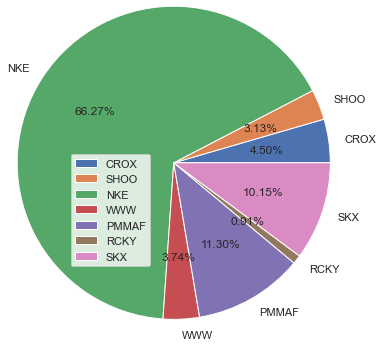

In [212]:
middle_price_revenue = fin_indicators.iloc[:7][['name', 'revenue']]
labels = 'CROX','SHOO','NKE','WWW', 'PMMAF','RCKY', 'SKX'
plt.pie(middle_price_revenue.revenue,labels=labels, autopct = '%.2f%%', radius=1.8)
plt.legend(loc='lower left')
plt.show()

Среди сегмента middle_price компания NKE занимает большую долю рынка - 66,27%.

In [237]:
market_share =(middle_price_revenue.revenue*100)/middle_price_revenue.revenue.sum()
market_share

0     4.497793
1     3.134400
2    66.272173
3     3.738791
4    11.300706
5     0.907992
6    10.148146
Name: revenue, dtype: float64

In [238]:
middle_price_revenue['revenue']

0     3.200
1     2.230
2    47.150
3     2.660
4     8.040
5     0.646
6     7.220
Name: revenue, dtype: float64

In [223]:
middle_price_stock = fin_indicators.iloc[:7][['name', 'stock_price']]
high_price_stock = fin_indicators.iloc[7:10][['name', 'stock_price']]

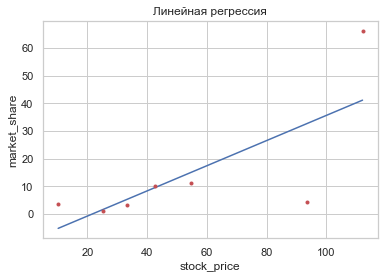

In [239]:
from sklearn.linear_model import LinearRegression
stock_price = middle_price_stock['stock_price']
model = LinearRegression()
result = model.fit(np.array(stock_price).reshape(-1,1), market_share)
plt.xlabel('stock_price')
plt.ylabel('market_share')
plt.title('Линейная регрессия')
x = np.linspace(min(stock_price), max(stock_price), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(stock_price, market_share, 'r.')
plt.show()

Линейная регрессия показывает некую линейную зависимость, проверим нулевую гипотезу о том, что доля рынка компании не связана со стоимостью этих акций с помощью критерия Манна-Уитни с уровнем значимости 0,05

In [240]:
import scipy as sc 
sc.stats.mannwhitneyu(stock_price, market_share)

MannwhitneyuResult(statistic=6.0, pvalue=0.010725366843161034)

pvalue меньше 0,05, поэтому отвергаем гипотезе об отсутствии связи. При увеличении доли рынка компании растет стоимость ее акций.

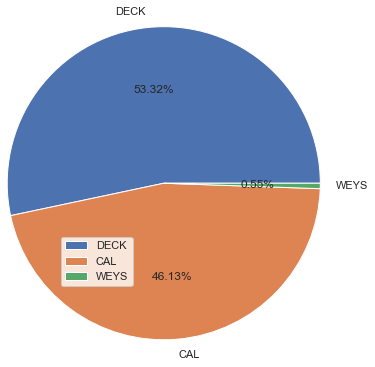

In [220]:
high_price_revenue = fin_indicators.iloc[7:10][['name', 'revenue']]
labels = 'DECK', 'CAL', 'WEYS'
plt.pie(high_price_revenue.revenue,labels=labels, autopct = '%.2f%%', radius=1.8)
plt.legend(loc='lower left')
plt.show()

In [242]:
market_share =(high_price_revenue.revenue*100)/high_price_revenue.revenue.sum()
market_share

7    53.319515
8    46.126853
9     0.553632
Name: revenue, dtype: float64

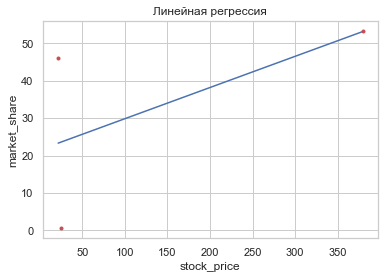

In [243]:
from sklearn.linear_model import LinearRegression
stock_price = high_price_stock['stock_price']
model = LinearRegression()
result = model.fit(np.array(stock_price).reshape(-1,1), market_share)
plt.xlabel('stock_price')
plt.ylabel('market_share')
plt.title('Линейная регрессия')
x = np.linspace(min(stock_price), max(stock_price), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(stock_price, market_share, 'r.')
plt.show()

На основе 3 компаний, у которых сильно разрознены значения, невозможно сделать никакого вывода  о связи доля рынка компании со стоимостью этих акций.